## Install Dependancies and Setup

In [1]:
!pip install tensorflow tensorflow opencv-python matplotlib

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcr

tensorboard                   2.11.2
tensorboard-data-server       0.6.1
tensorboard-plugin-wit        1.8.1
tensorflow                    2.11.0
tensorflow-estimator          2.11.0
tensorflow-io-gcs-filesystem  0.29.0
termcolor                     2.2.0
terminado                     0.13.1
testpath                      0.6.0
text-unidecode                1.3
textdistance                  4.2.1
threadpoolctl                 2.2.0
three-merge                   0.1.1
tifffile                      2021.7.2
tinycss                       0.4
tldextract                    3.2.0
toml                          0.10.2
tomli                         2.0.1
tomlkit                       0.11.1
toolz                         0.11.2
tornado                       6.1
tqdm                          4.64.1
traitlets                     5.1.1
Twisted                       22.2.0
typing_extensions             4.3.0
ujson                         5.4.0
Unidecode                     1.2.0
urllib3              

In [3]:
import tensorflow as tf
import os

2023-05-26 01:51:59.717564: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [5]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Remove dodgy images

In [7]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [8]:
if os.path.isfile("Stance_Data/.DS_Store"):
    os.remove("Stance_Data/.DS_Store")

In [9]:
data_dir = 'Stance_Data'

In [10]:
image_exts = ['jpeg','jpg','bmp','png']

In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image Stance_Data/Correct/.ipynb_checkpoints


## Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt  

In [13]:
Stance_Data = tf.keras.utils.image_dataset_from_directory('Stance_Data')

Found 116 files belonging to 2 classes.


2023-05-26 01:52:37.570851: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
data_iterator = Stance_Data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

2023-05-26 01:52:48.300160: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 102 of 256
2023-05-26 01:52:49.340196: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


In [16]:
batch[0].shape

(32, 256, 256, 3)

In [17]:
batch[1]

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [18]:
batch

(array([[[[ 18.007812,  41.007812,  59.007812],
          [ 20.382812,  42.132812,  60.757812],
          [ 25.335938,  46.335938,  65.33594 ],
          ...,
          [ 33.664062,  52.101562,  64.97656 ],
          [ 45.789062,  64.47656 ,  72.17969 ],
          [ 44.257812,  61.695312,  70.57031 ]],
 
         [[ 22.007812,  45.007812,  63.007812],
          [ 29.757812,  52.757812,  70.75781 ],
          [ 19.546875,  42.546875,  60.546875],
          ...,
          [104.61719 , 113.61719 , 110.61719 ],
          [ 91.97656 , 101.09375 ,  98.84375 ],
          [ 93.921875,  97.921875,  99.546875]],
 
         [[ 17.648438,  39.648438,  52.648438],
          [ 23.421875,  46.046875,  61.296875],
          [ 23.523438,  46.523438,  64.52344 ],
          ...,
          [117.703125, 121.703125, 124.703125],
          [134.36719 , 133.61719 , 132.74219 ],
          [129.53125 , 127.53125 , 128.53125 ]],
 
         ...,
 
         [[152.32812 , 178.32812 , 153.32812 ],
          [153.460

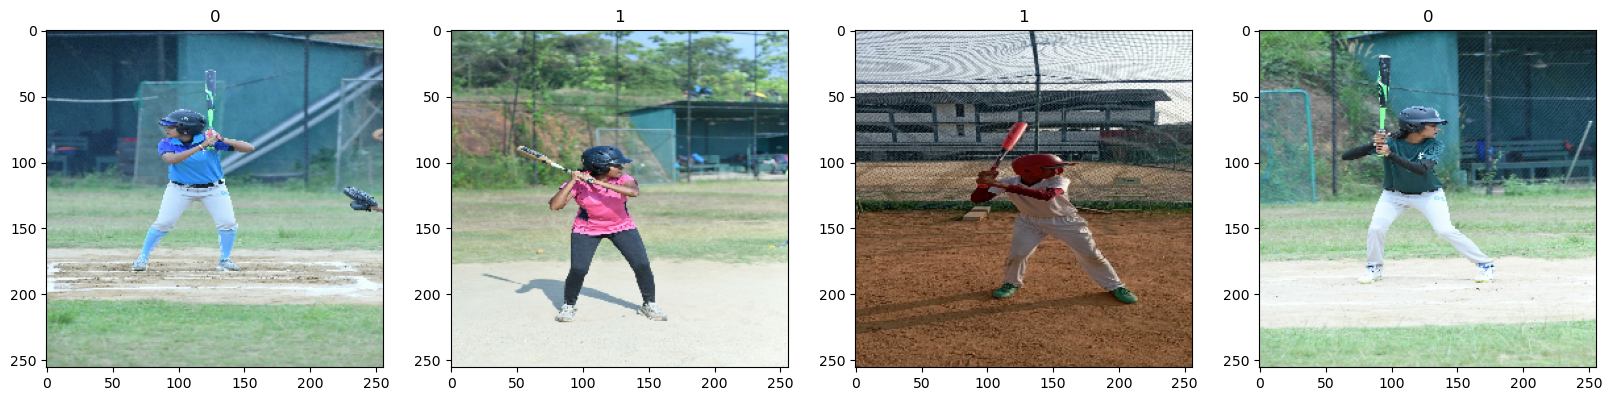

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    
# 0 = Correct / 1 = Incorrect

## Preprocess Data

In [20]:
scaled = batch[0] / 255

In [21]:
scaled.max()

1.0

In [22]:
Stance_Data = Stance_Data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [23]:
scaled_iterator = Stance_Data.as_numpy_iterator()

In [24]:
batch = scaled_iterator.next()

In [25]:
batch[0].max()

1.0

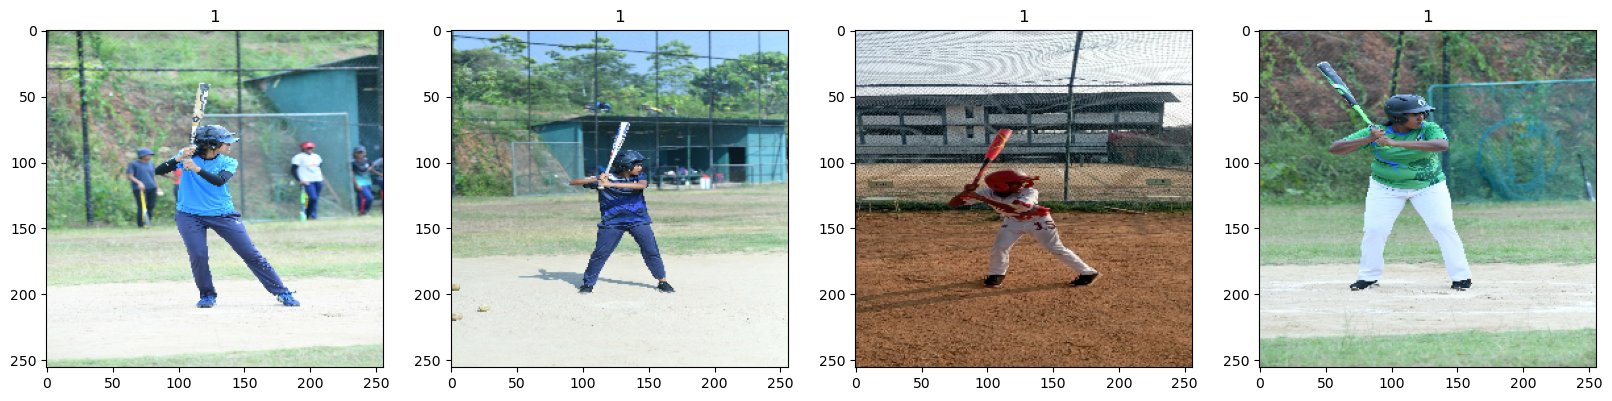

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## Split Data

In [27]:
len(Stance_Data)

4

In [28]:
train_size = int(len(Stance_Data)*.7)
val_size = int(len(Stance_Data)*.1)
test_size = int(len(Stance_Data)*.1)+1

In [29]:
train_size+val_size+test_size

3

In [30]:
train = Stance_Data.take(train_size)
val = Stance_Data.skip(train_size).take(val_size)
test = Stance_Data.skip(train_size + val_size). take(test_size)

In [31]:
len(train)

2

In [32]:
len(test)

1

## Build Deep Learning Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [34]:
model = Sequential()

In [35]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [36]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Train

In [38]:
logdir='logs'

In [39]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [40]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-05-26 01:53:15.426647: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 72 of 256
2023-05-26 01:53:19.571655: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


2/2 [==============================] - 22s 2s/step - loss: 1.0545 - accuracy: 0.4844
Epoch 2/20


2023-05-26 01:53:34.708159: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 115 of 256
2023-05-26 01:53:34.709162: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


2/2 [==============================] - 15s 2s/step - loss: 0.8895 - accuracy: 0.5312
Epoch 3/20


2023-05-26 01:53:49.355175: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 92 of 256
2023-05-26 01:53:50.898578: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


2/2 [==============================] - 15s 1s/step - loss: 0.7386 - accuracy: 0.5000
Epoch 4/20


2023-05-26 01:54:09.712570: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 97 of 256
2023-05-26 01:54:11.679736: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


2/2 [==============================] - 17s 2s/step - loss: 0.6803 - accuracy: 0.5625
Epoch 5/20


2023-05-26 01:54:27.259032: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 79 of 256
2023-05-26 01:54:31.204834: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


2/2 [==============================] - 18s 2s/step - loss: 0.6693 - accuracy: 0.5000
Epoch 6/20


2023-05-26 01:54:45.529627: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 87 of 256
2023-05-26 01:54:49.206453: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


2/2 [==============================] - 19s 2s/step - loss: 0.6612 - accuracy: 0.5312
Epoch 7/20


2023-05-26 01:55:04.661442: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 92 of 256
2023-05-26 01:55:08.122688: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


2/2 [==============================] - 18s 2s/step - loss: 0.6647 - accuracy: 0.5000
Epoch 8/20


2023-05-26 01:55:23.185217: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 72 of 256
2023-05-26 01:55:27.706695: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


2/2 [==============================] - 20s 3s/step - loss: 0.6181 - accuracy: 0.5469
Epoch 9/20


2023-05-26 01:55:43.059894: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 81 of 256
2023-05-26 01:55:46.896006: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


2/2 [==============================] - 18s 2s/step - loss: 0.6531 - accuracy: 0.5156
Epoch 10/20


2023-05-26 01:56:01.568547: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 81 of 256
2023-05-26 01:56:05.774359: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


2/2 [==============================] - 20s 2s/step - loss: 0.6018 - accuracy: 0.7969
Epoch 11/20


2023-05-26 01:56:20.665134: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 77 of 256
2023-05-26 01:56:25.458904: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


2/2 [==============================] - 19s 2s/step - loss: 0.5791 - accuracy: 0.7812
Epoch 12/20


2023-05-26 01:56:39.989121: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 83 of 256
2023-05-26 01:56:43.611312: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


2/2 [==============================] - 18s 2s/step - loss: 0.5221 - accuracy: 0.7500
Epoch 13/20


2023-05-26 01:57:00.767089: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 81 of 256
2023-05-26 01:57:05.119758: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


2/2 [==============================] - 19s 2s/step - loss: 0.5038 - accuracy: 0.8125
Epoch 14/20


2023-05-26 01:57:20.967175: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 76 of 256
2023-05-26 01:57:25.244865: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


2/2 [==============================] - 20s 3s/step - loss: 0.5417 - accuracy: 0.6875
Epoch 15/20


2023-05-26 01:57:40.838585: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 85 of 256
2023-05-26 01:57:44.416247: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


2/2 [==============================] - 18s 2s/step - loss: 0.4929 - accuracy: 0.7344
Epoch 16/20


2023-05-26 01:57:58.930884: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 100 of 256
2023-05-26 01:58:01.299219: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


2/2 [==============================] - 17s 2s/step - loss: 0.3964 - accuracy: 0.8906
Epoch 17/20
2/2 [==============================] - 12s 1s/step - loss: 0.4170 - accuracy: 0.8125
Epoch 18/20
2/2 [==============================] - 9s 1s/step - loss: 0.3501 - accuracy: 0.9062
Epoch 19/20
2/2 [==============================] - 10s 1s/step - loss: 0.3032 - accuracy: 0.8906
Epoch 20/20
2/2 [==============================] - 9s 1s/step - loss: 0.3363 - accuracy: 0.8125


## Plot Performane

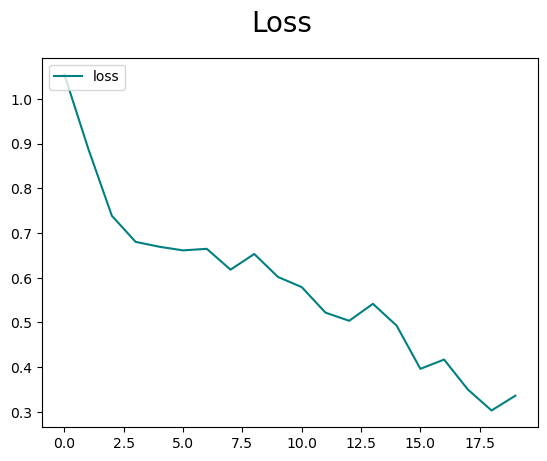

In [41]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
# plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

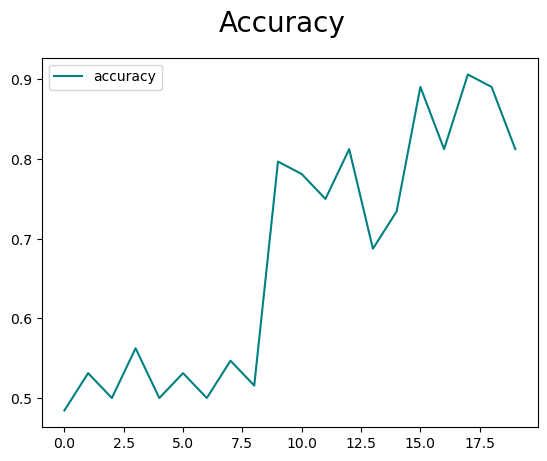

In [42]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
# plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [43]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [44]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [45]:
len(test)
## Result should be 1 - Not Sure

1

In [46]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 561ms/step


In [47]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.8666666746139526, Recall:0.8666666746139526, Accuracy:0.875


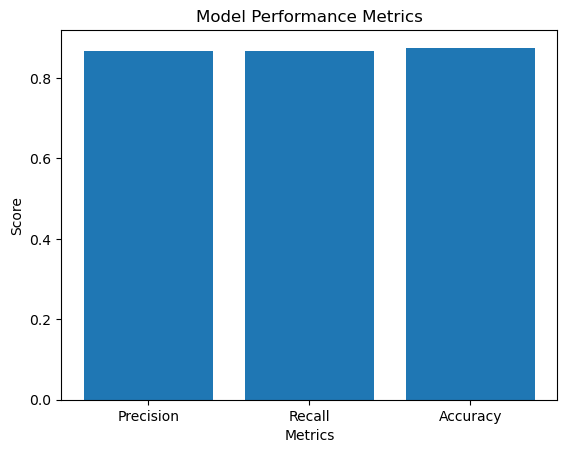

In [48]:
precision = pre.result().numpy()
recall = re.result().numpy()
accuracy = acc.result().numpy()

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(['Precision', 'Recall', 'Accuracy'], [precision, recall, accuracy])

# Add labels to the chart
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics')

# Display the chart
plt.show()

In [49]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.8666667, shape=(), dtype=float32) tf.Tensor(0.8666667, shape=(), dtype=float32) tf.Tensor(0.875, shape=(), dtype=float32)


## Test

In [50]:
import cv2

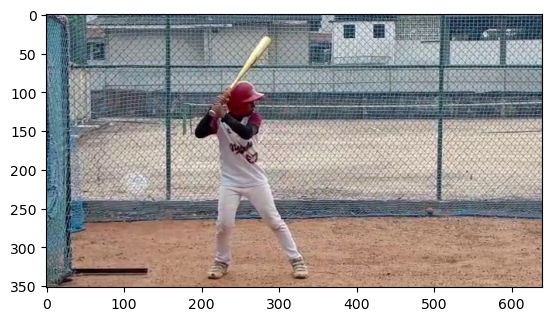

In [51]:
img = cv2.imread('1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

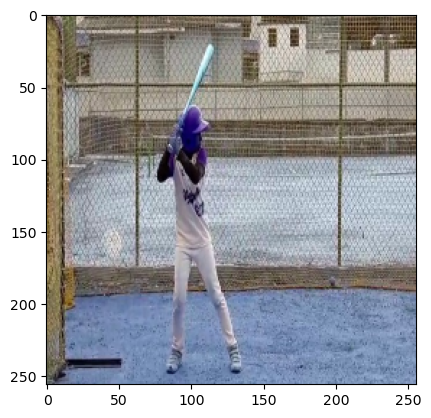

In [52]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [53]:
# cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image = resize.numpy().astype(int)

In [54]:
# preprocessed_image = cv2.resize(image, (256, 256))

# Save the preprocessed image to a local directory
output_image_path = 'preprocessed_image.jpg'
cv2.imwrite(output_image_path, image)

True

In [55]:
np.expand_dims(resize, 0)

array([[[[ 62.40625 ,  50.40625 ,  32.40625 ],
         [ 93.828125,  80.328125,  64.328125],
         [158.46875 , 143.46875 , 127.46875 ],
         ...,
         [142.39062 , 128.39062 , 110.390625],
         [108.453125,  94.453125,  76.453125],
         [144.59375 , 130.59375 , 112.59375 ]],

        [[ 95.171875,  82.046875,  63.484375],
         [129.03125 , 115.25    ,  98.125   ],
         [123.421875, 108.984375,  91.859375],
         ...,
         [144.4375  , 129.3125  , 111.875   ],
         [128.85938 , 113.734375,  96.296875],
         [143.51562 , 128.39062 , 110.953125]],

        [[ 77.09375 ,  63.09375 ,  44.09375 ],
         [ 82.5     ,  68.5     ,  50.5     ],
         [ 79.03125 ,  65.03125 ,  47.03125 ],
         ...,
         [ 93.15625 ,  77.15625 ,  60.15625 ],
         [ 72.015625,  56.015625,  39.015625],
         [ 65.6875  ,  49.6875  ,  32.6875  ]],

        ...,

        [[109.671875, 116.1875  , 112.046875],
         [122.03125 , 128.79688 , 123.921875]

In [56]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 120ms/step


In [57]:
output_image_path = '5.jpg'
cv2.imwrite(output_image_path, image1)

NameError: name 'image1' is not defined

In [ ]:
print(yhat)
## 0 - Correct | 1 = Incorrect

In [ ]:
if yhat > 0.5:
    print(f'Predicted Class is INCORRECT')
else:
    print(f'Predicted Class is CORRECT')

In [ ]:
print(yhat*100)

## Save the Model

In [ ]:
from tensorflow.keras.models import load_model
import keras

In [ ]:
model.save(os.path.join('stance_models','stanceClassifier.keras.h5'))

In [ ]:
new_model = load_model(os.path.join('stance_models', 'stanceClassifier.keras.h5'))

In [ ]:
new_model

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
print(yhatnew)

In [ ]:
if yhatnew > 0.5:
    print(f'Predicted Class is INCORRECT')
else:
    print(f'Predicted Class is CORRECT')

In [ ]:
print(yhatnew*100)

In [ ]:
# import pickle
# import tensorflow as tf

# # Load the trained model
# model = new_model

# # Convert the model to a pickle object
# model_pickle = pickle.dumps(model)

# # Save the pickle object to a file
# with open('stance_model.pkl', 'wb') as f:
#     f.write(model_pickle)


In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc

# # Assuming that pre, re, acc, y_true, and y_pred are the precision, recall, accuracy, true labels, and predicted labels, respectively
# precision = pre.result().numpy()
# recall = re.result().numpy()
# accuracy = acc.result().numpy()

# # Calculate the ROC curve and AUC score
# fpr, tpr, thresholds = roc_curve(y, yhat)
# roc_auc = auc(fpr, tpr)

# # Create a bar chart
# fig, ax = plt.subplots()
# ax.bar(['Precision', 'Recall', 'Accuracy', 'AUC'], [precision, recall, accuracy, roc_auc])

# # Add the ROC curve to the plot
# ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# ax.plot([0, 1], [0, 1], 'k--')
# ax.set_xlim([0.0, 1.0])
# ax.set_ylim([0.0, 1.05])
# ax.set_xlabel('False Positive Rate')
# ax.set_ylabel('True Positive Rate')
# ax.set_title('Model Performance Metrics and ROC Curve')
# ax.legend(loc="lower right")

# # Display the plot
# plt.show()